<a href="https://colab.research.google.com/github/prrmzz/MNIST-Parham/blob/main/MnistParham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install -q tensorflow-datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [3]:
(train, test), info = tfds.load('mnist', split=['train', 'test'], as_supervised=True, with_info=True)

In [4]:
def normalize(image, label):
    return tf.cast(image, tf.float32) / 256.0, label

In [5]:
train = train.map(normalize)
train = train.cache()
train = train.shuffle(info.splits['train'].num_examples)
train = train.batch(256)
train = train.prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
test = test.map(normalize)
test = test.batch(256)
test = test.cache()
test = test.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,762 (776.41 KB)

 Trainable params: 198,122 (773.91 KB)

 Non-trainable params: 640 (2.50 KB)

In [10]:
history = model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 229s 890ms/step - accuracy: 0.8080 - loss: 0.6699 - val_accuracy: 0.1135 - val_loss: 6.2236
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 207s 880ms/step - accuracy: 0.9734 - loss: 0.0906 - val_accuracy: 0.7300 - val_loss: 0.7818
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 850ms/step - accuracy: 0.9808 - loss: 0.0654 - val_accuracy: 0.9845 - val_loss: 0.0502
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 205s 871ms/step - accuracy: 0.9858 - loss: 0.0481 - val_accuracy: 0.9903 - val_loss: 0.0296
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 213s 905ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9917 - val_loss: 0.0227
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 218s 929ms/step - accuracy: 0.9896 - loss: 0.0338 - val_accuracy: 0.9921 - val_loss: 0.0227
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 216s 920ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9937 - val_loss: 0.0198
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 217s 922ms/step - accuracy: 0.9914 -

In [11]:
test_loss, test_accuracy = model.evaluate(test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.9940 - loss: 0.0180

Test Accuracy: 99.44%


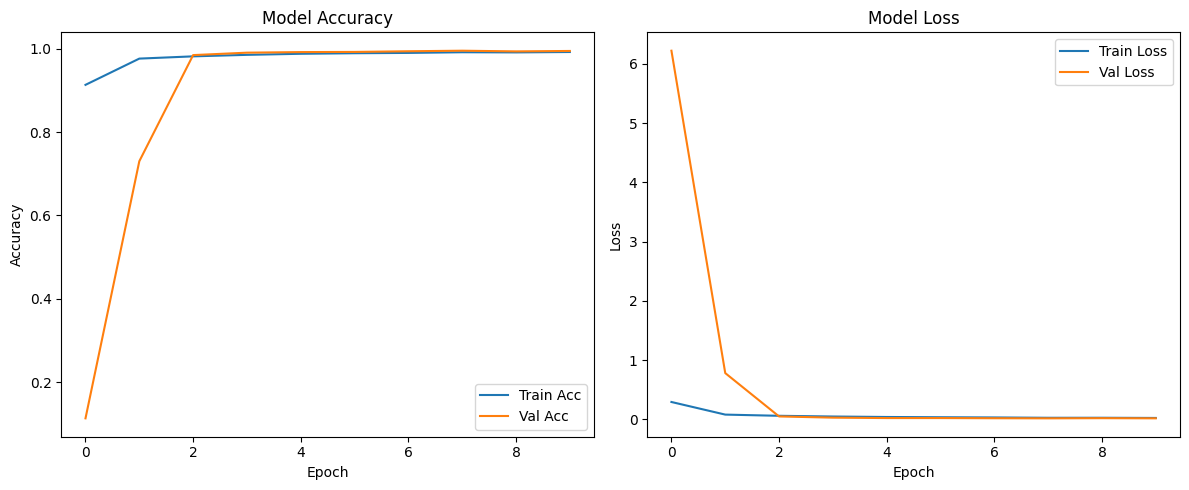

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()